<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entri

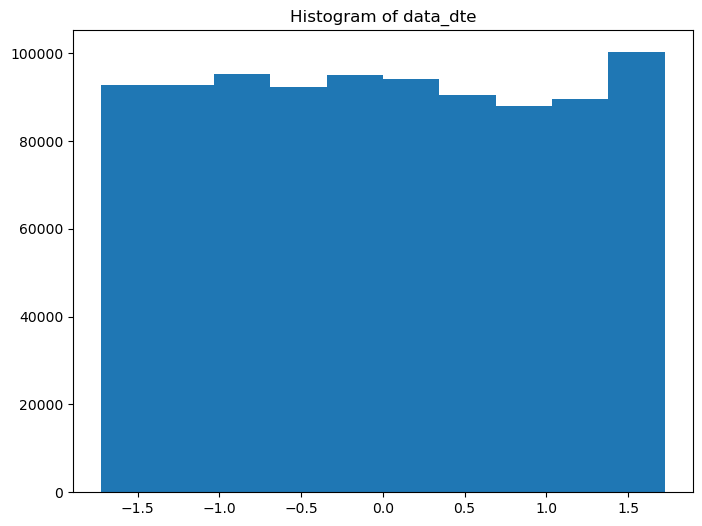

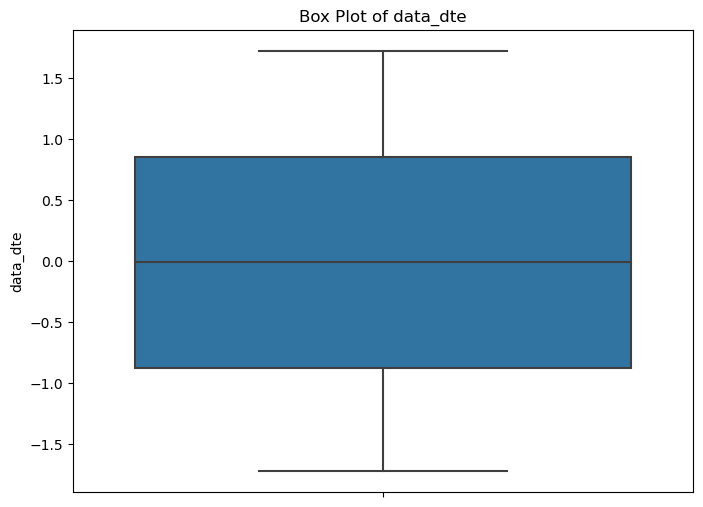

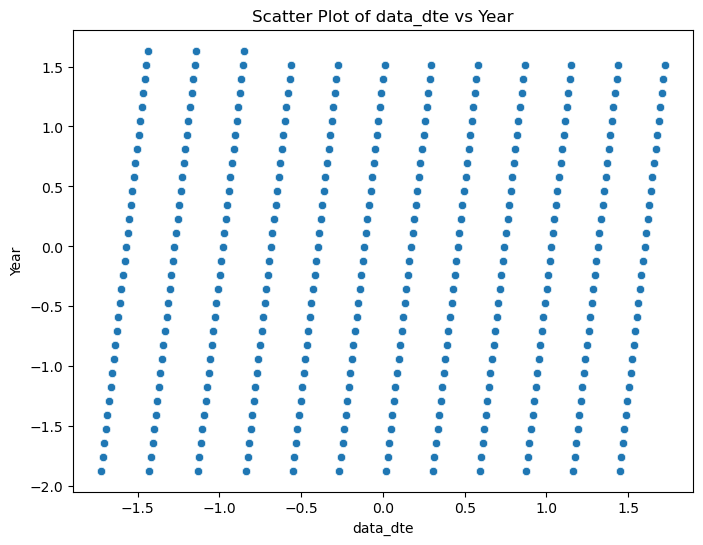

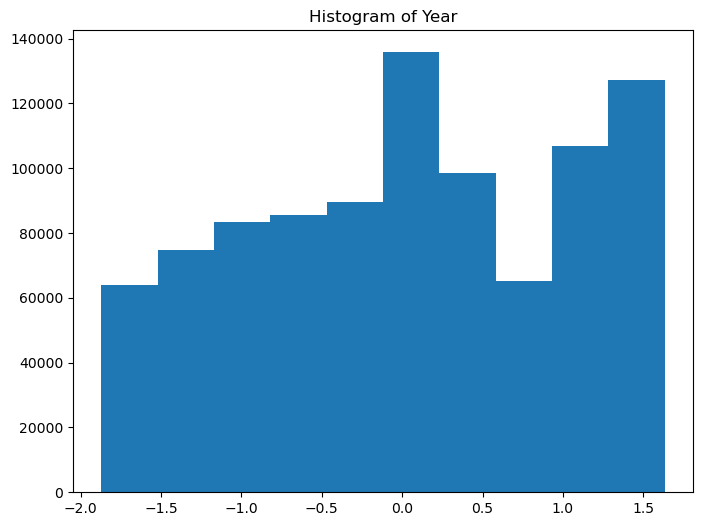

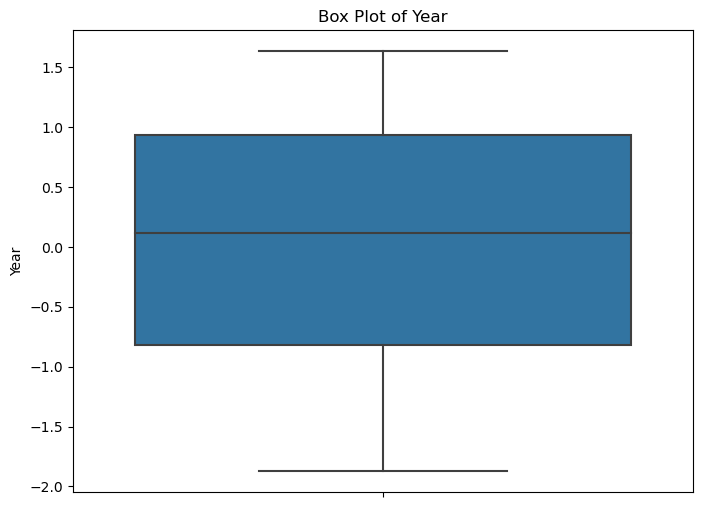

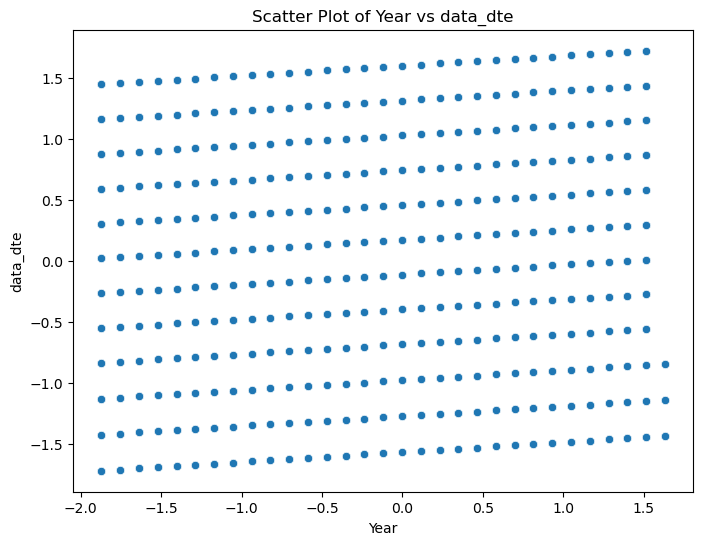

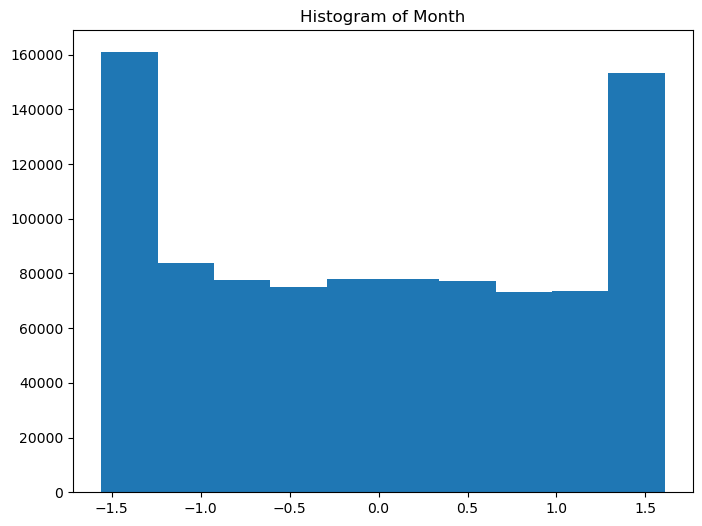

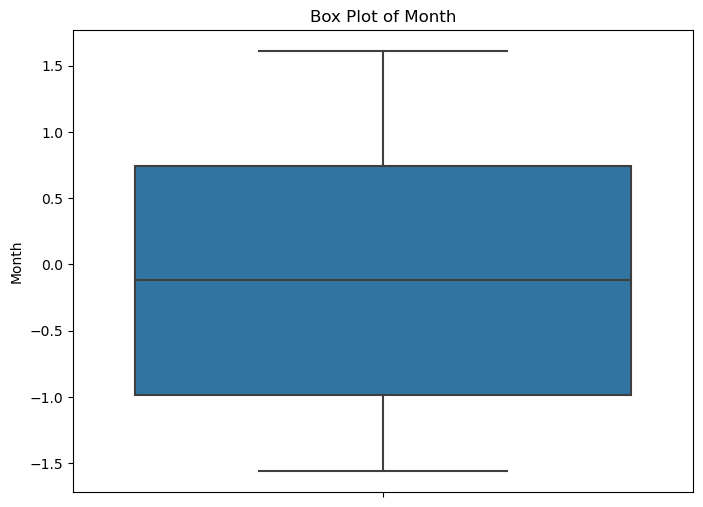

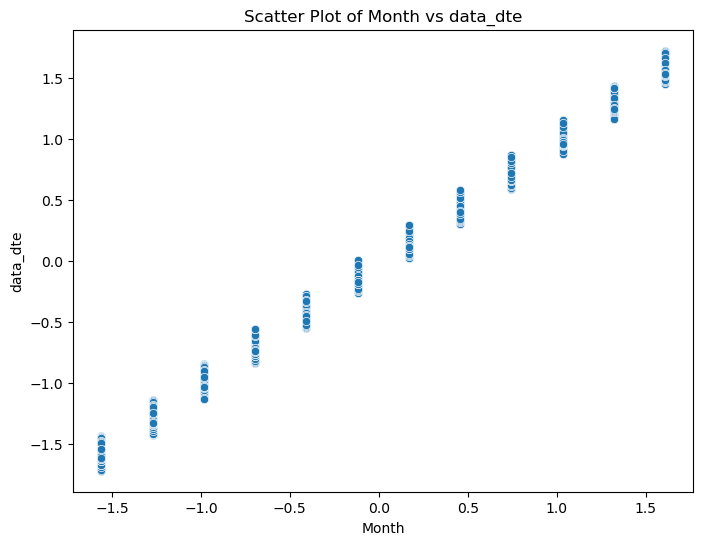

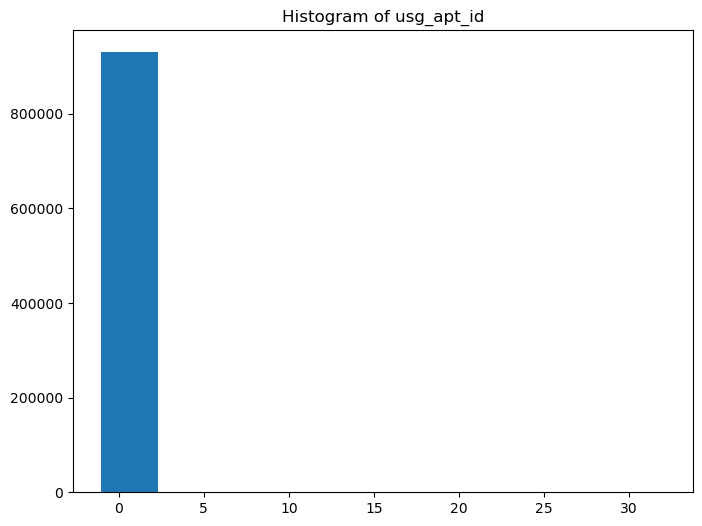

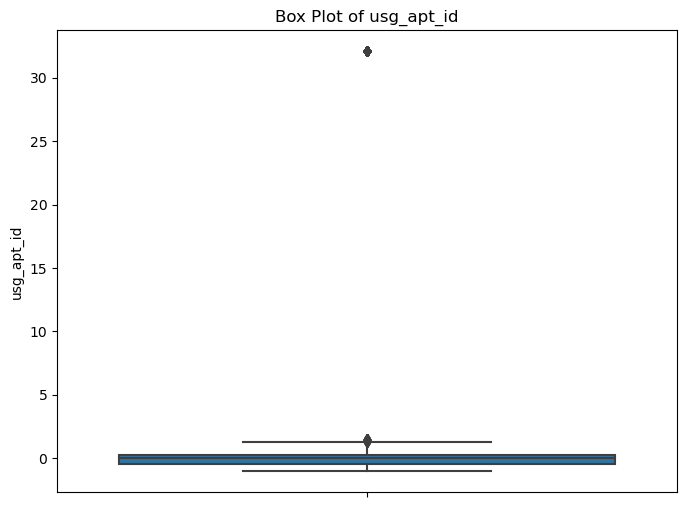

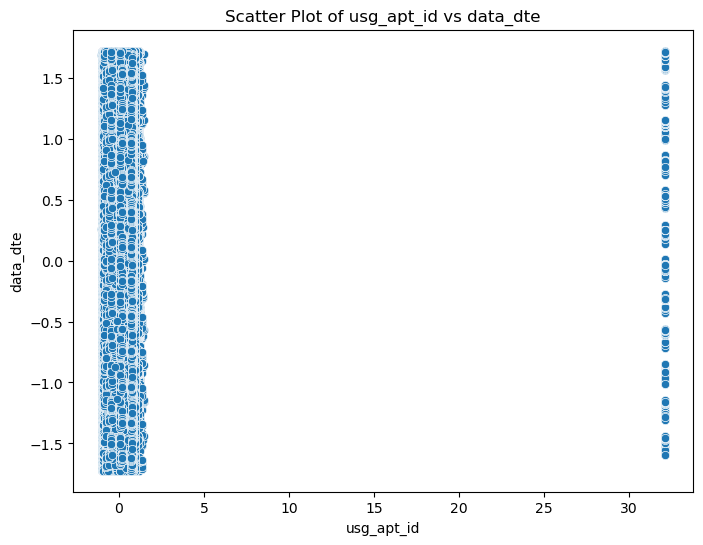

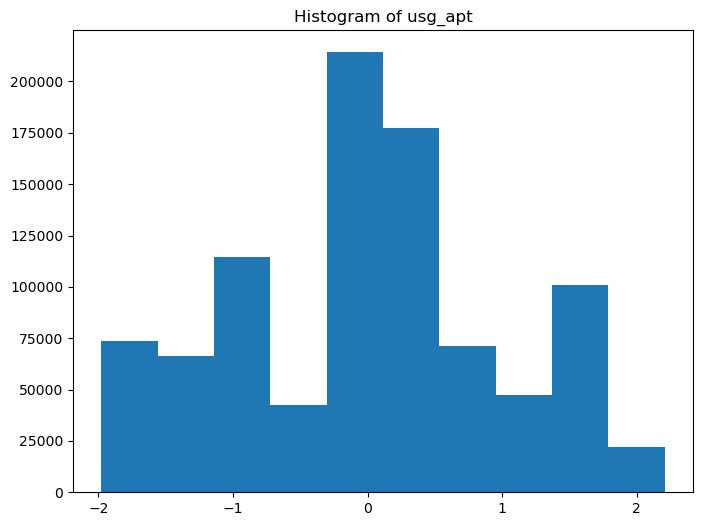

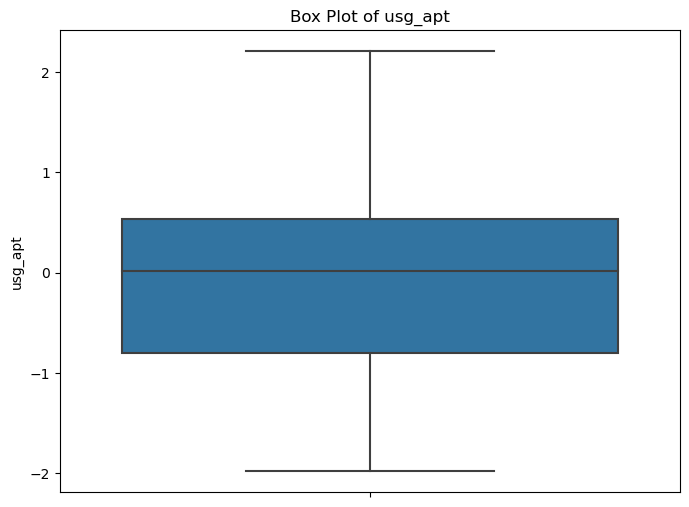

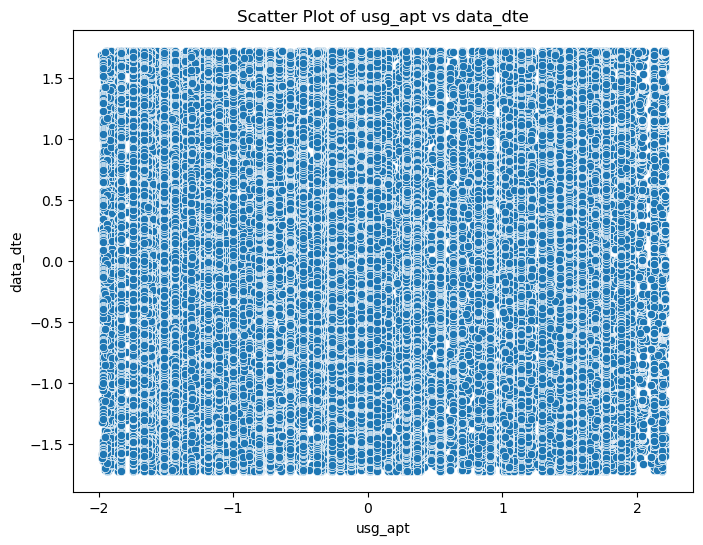

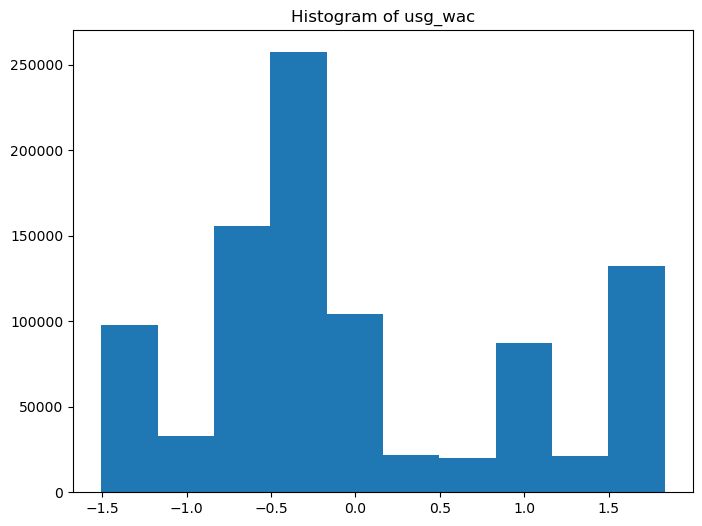

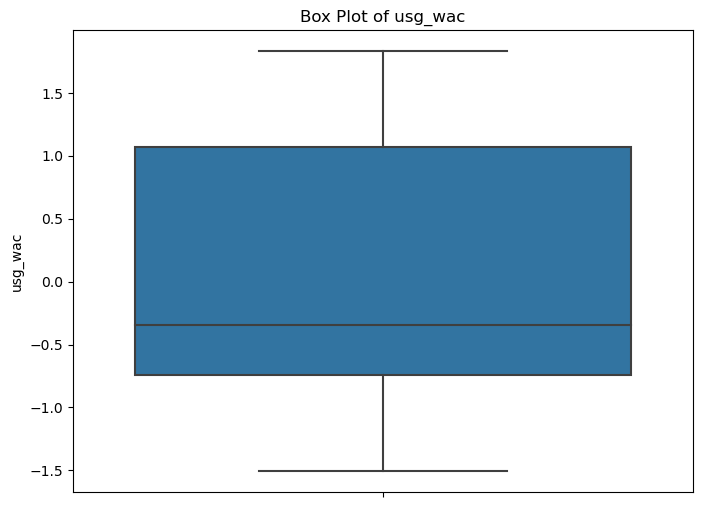

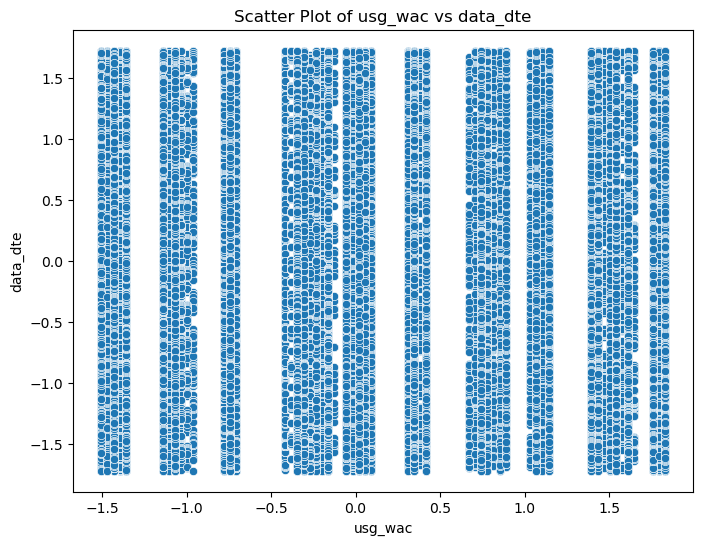

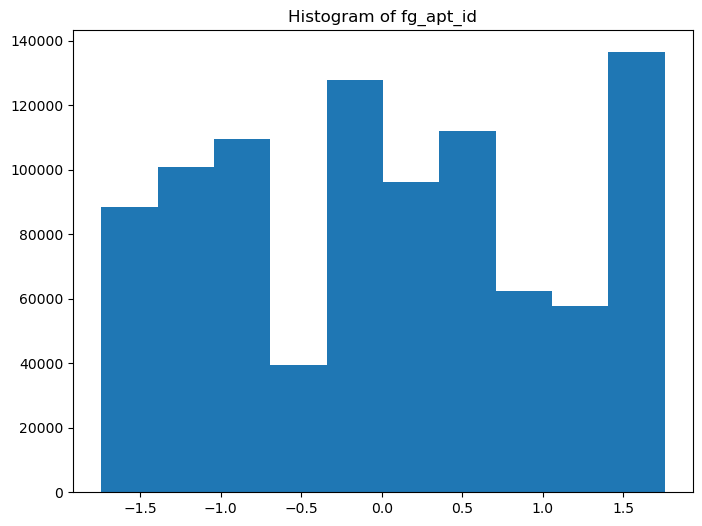

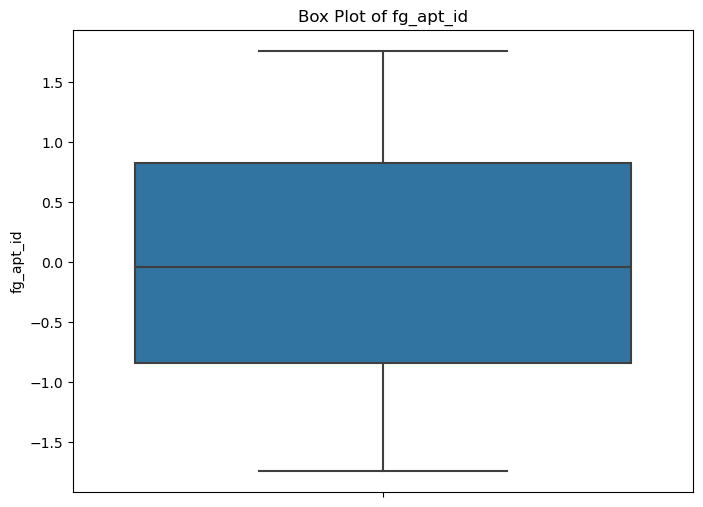

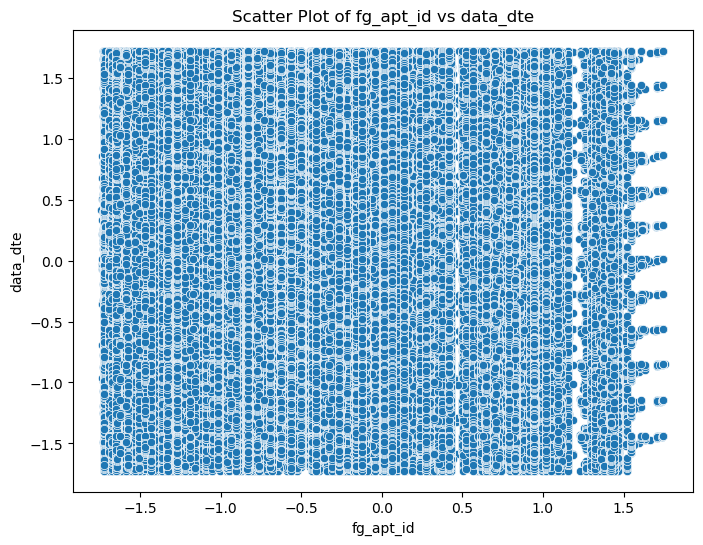

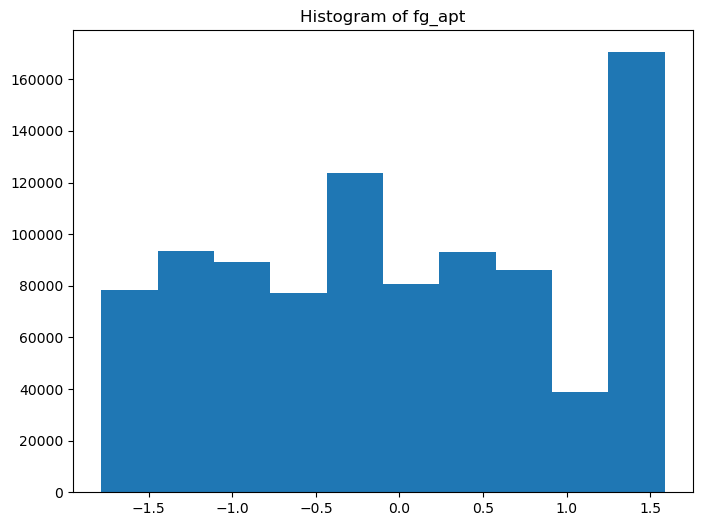

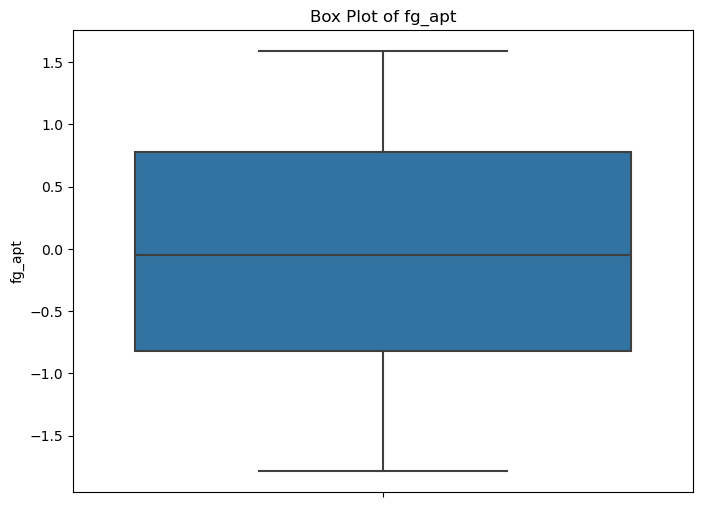

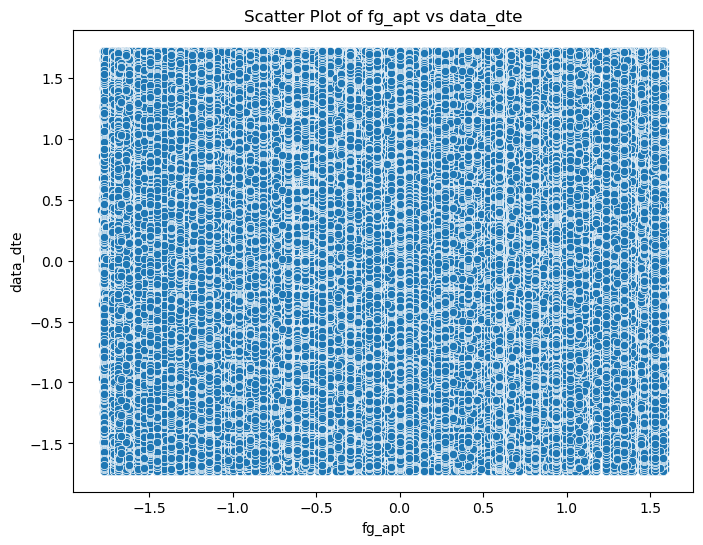

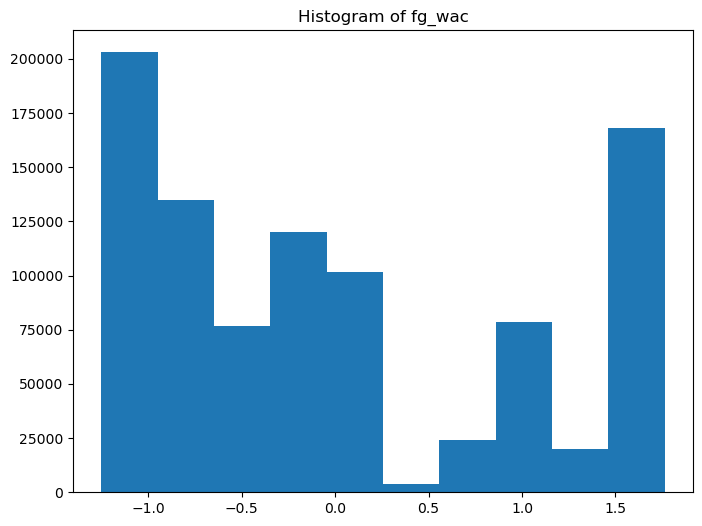

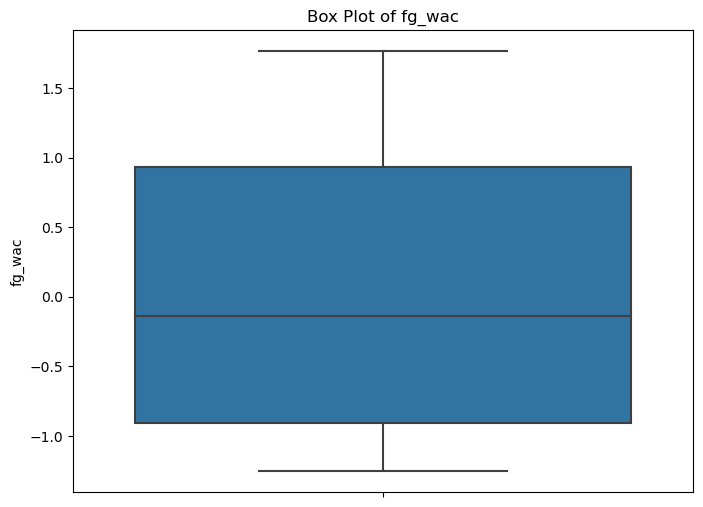

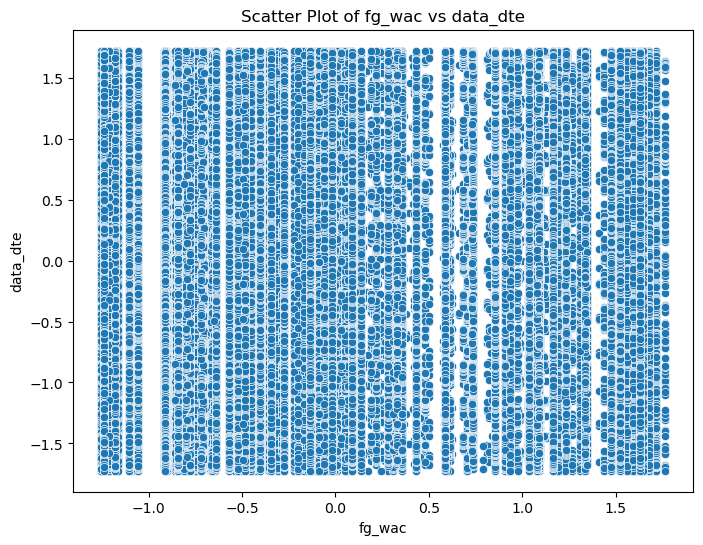

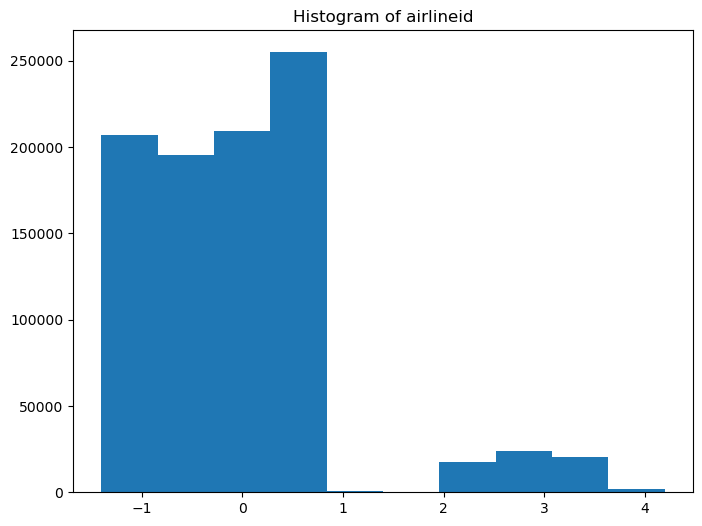

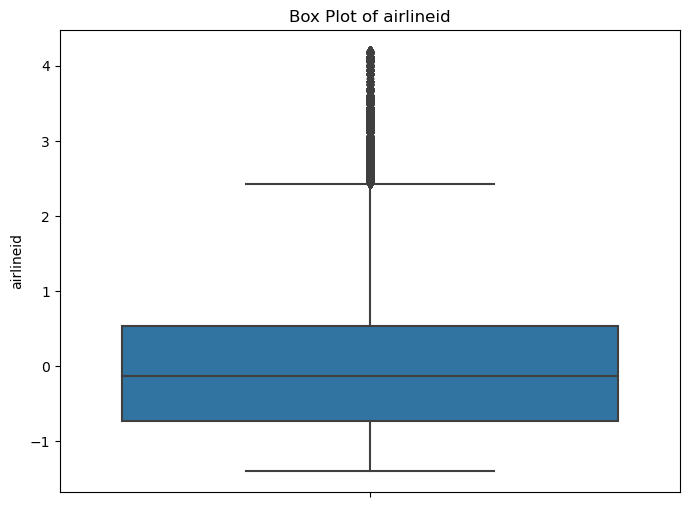

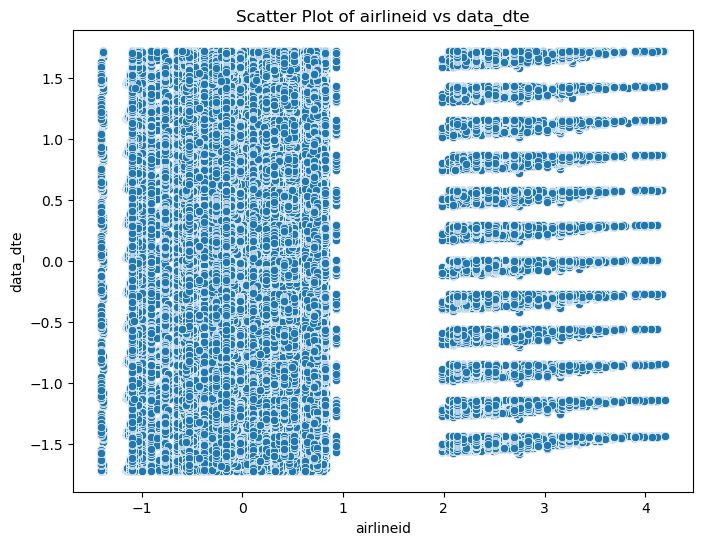

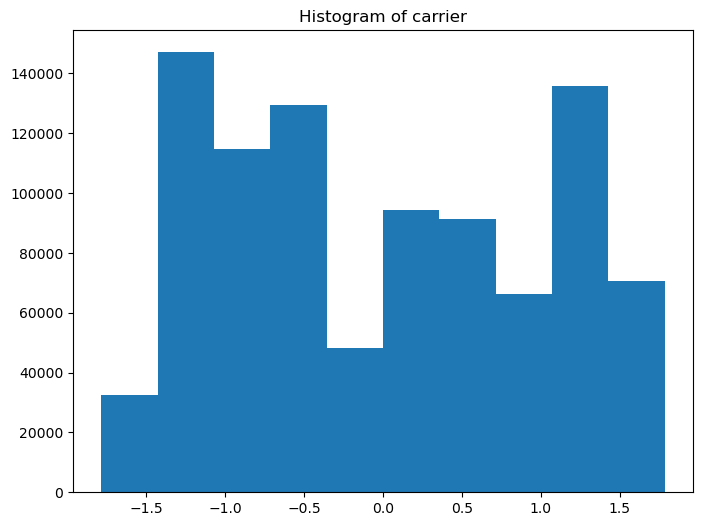

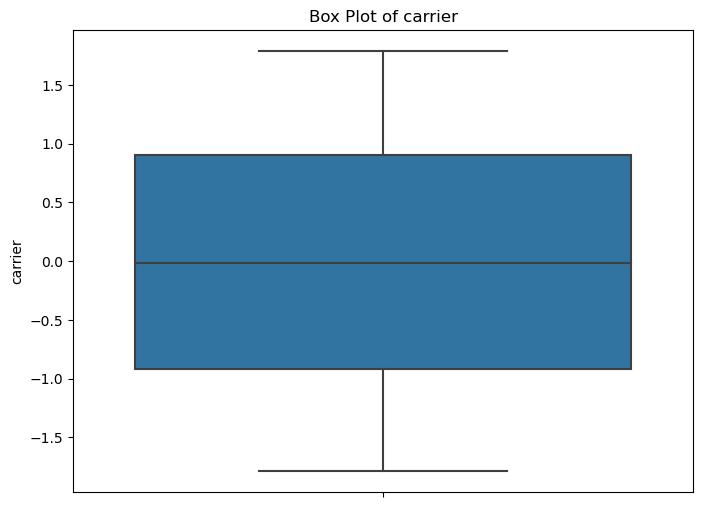

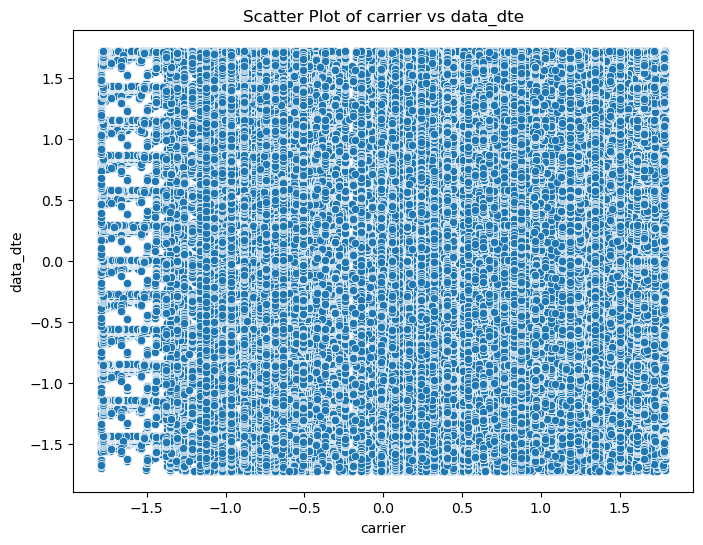

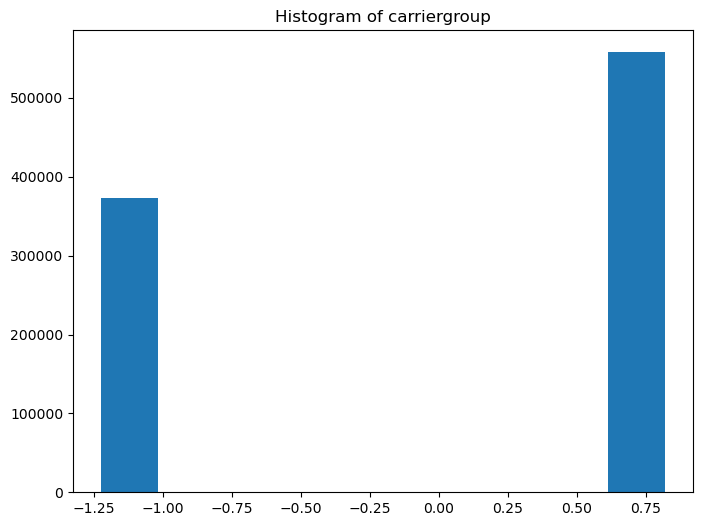

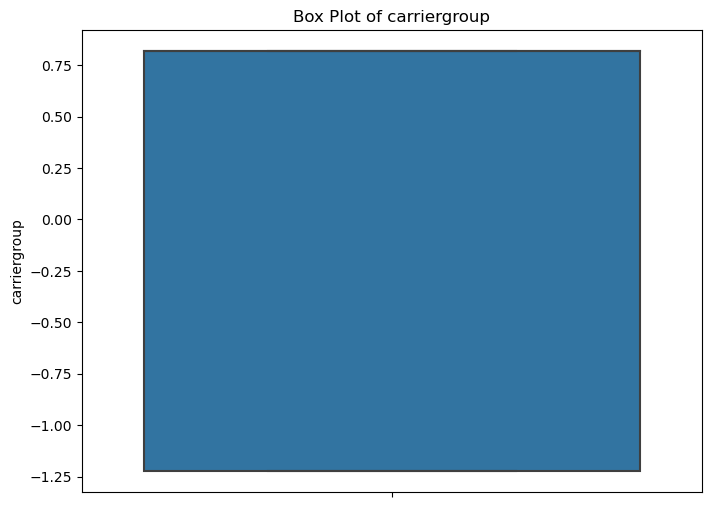

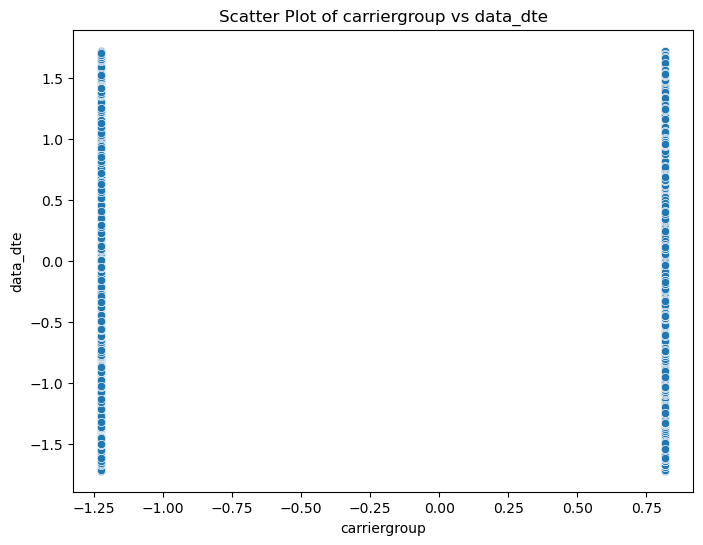

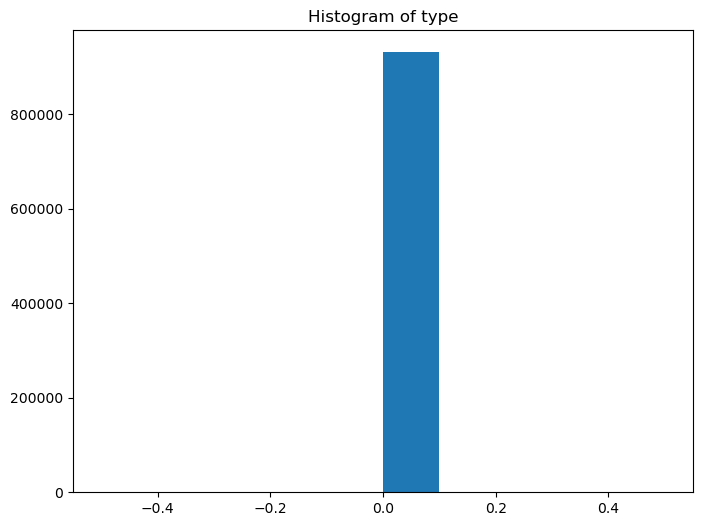

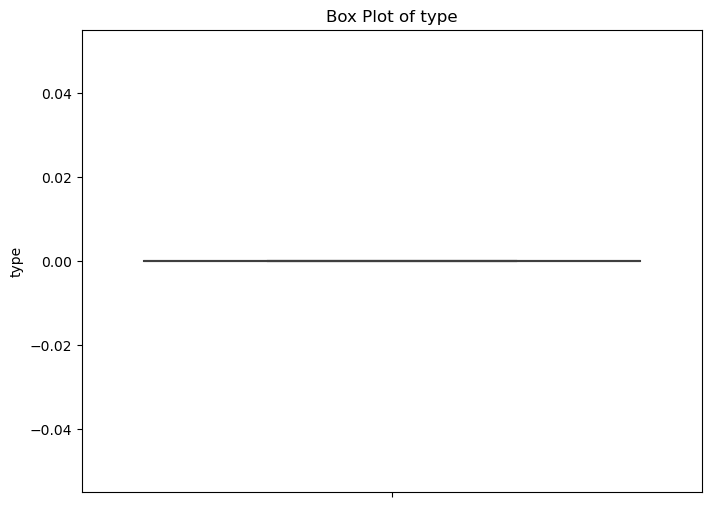

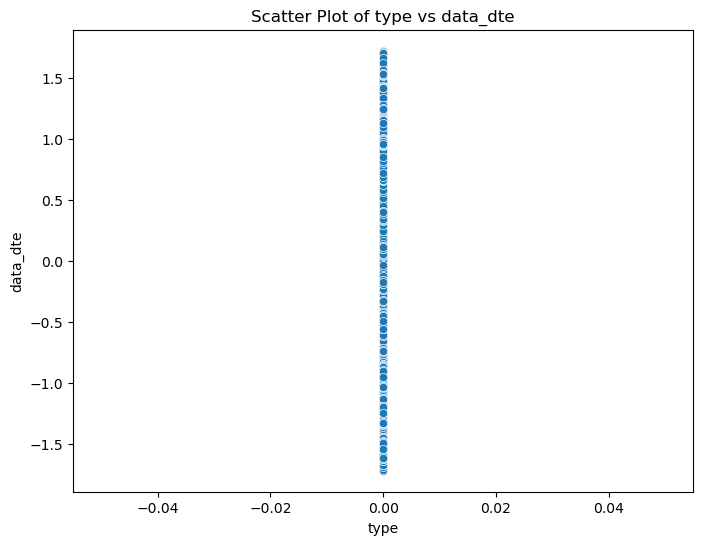

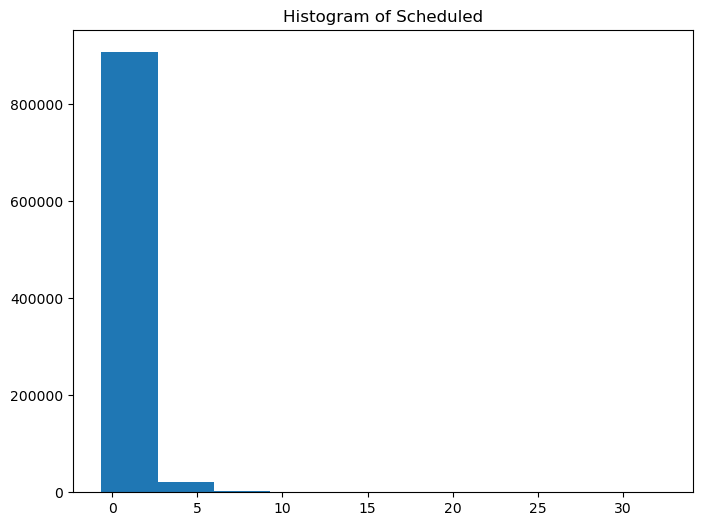

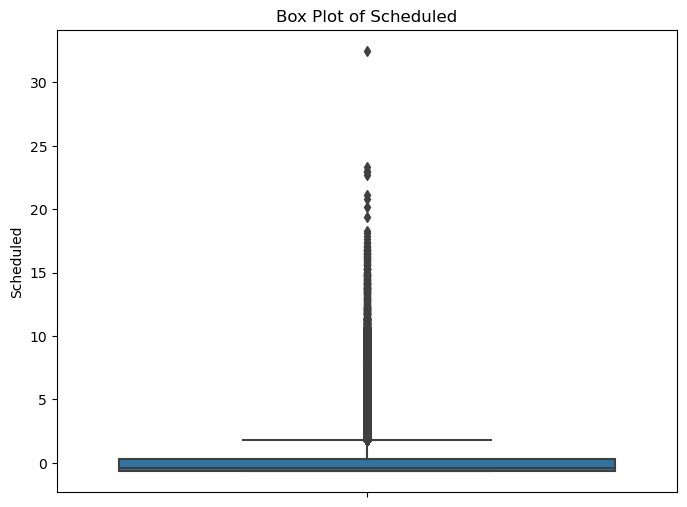

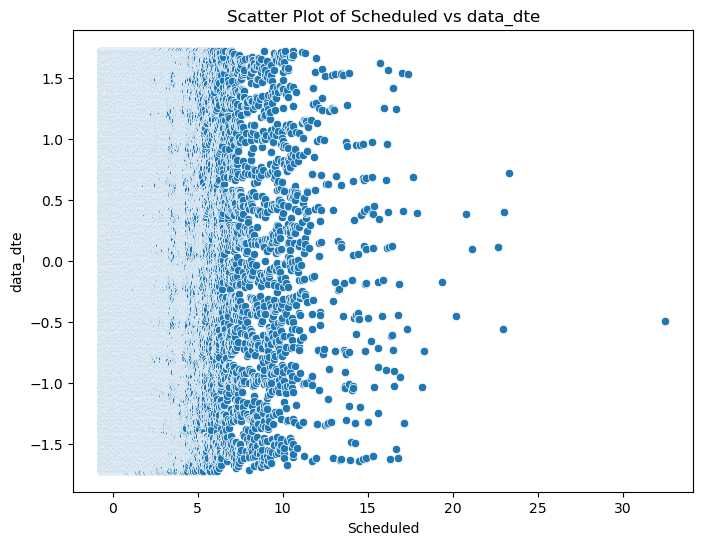

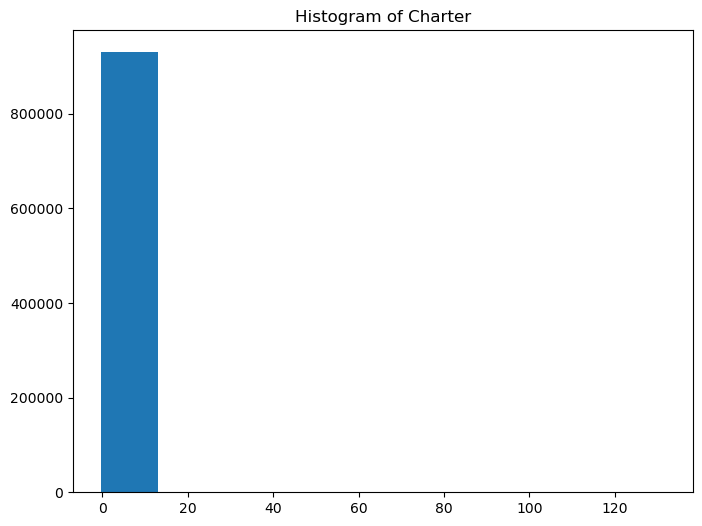

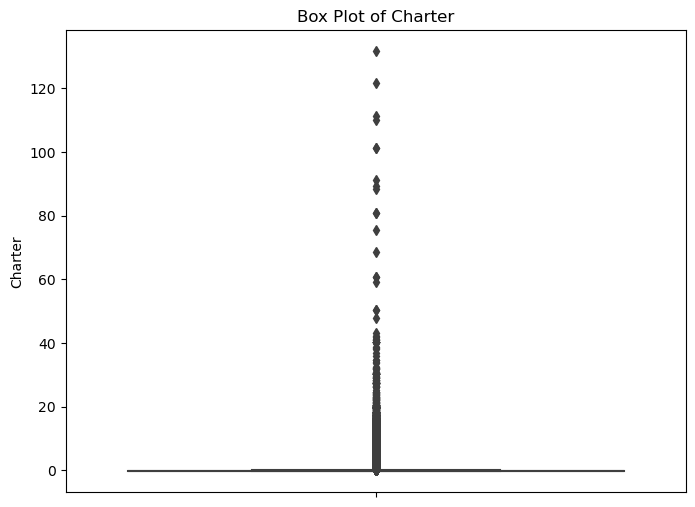

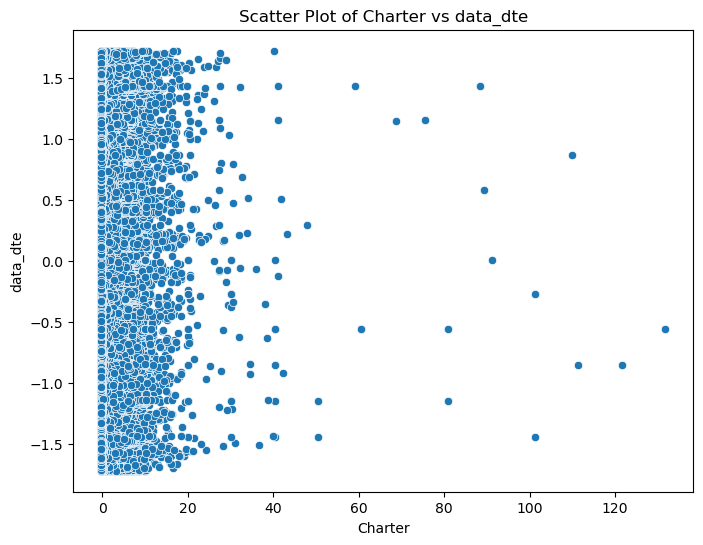

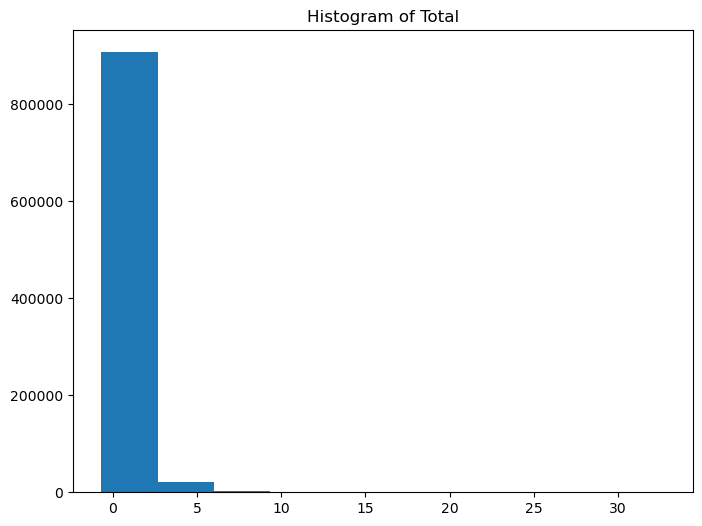

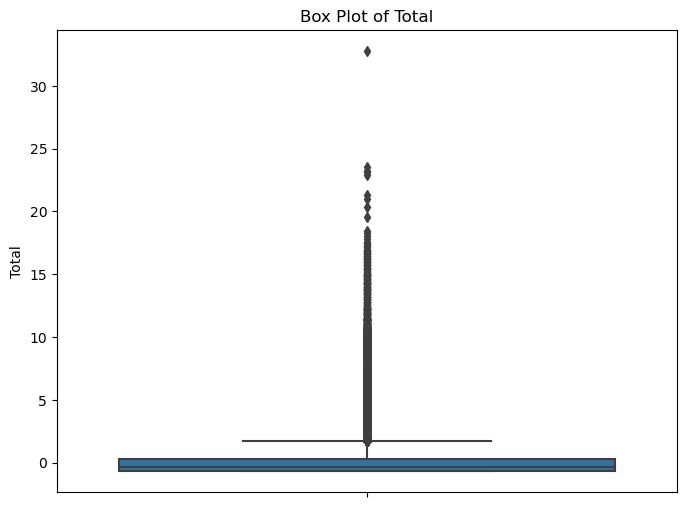

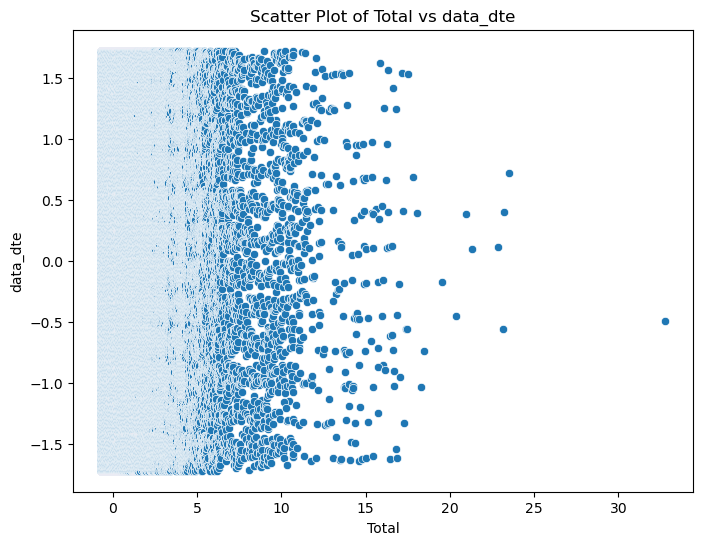

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sqlite3


def load_data(file_path):
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        conn = sqlite3.connect(file_path)
        query = "SELECT * FROM your_table_name;"
        data = pd.read_sql_query(query, conn)
        conn.close()
    else:
        raise ValueError("Unsupported file format. Please provide a CSV, Excel, or SQL file.")
    return data

def preprocess_data(df):
    #It will pre-process the data by identifying the data types of each column and performing appropriate pre-processing
    #steps such as handling missing values, encoding categorical features, scaling numerical features, and more.
    #The tool will also provide options for feature selection and dimensionality reduction

    # being familiar with the data
    df.shape
    df.columns
    df.info()
    df.head()

    # handling missing values and duplicates
    df.isna().sum()
    df.fillna(0, inplace=True)
    df.duplicated().sum()
    df.drop_duplicates()
    df.describe()

    #encoding categorical features
    encoded_df = df.copy()
    label_encoder = LabelEncoder()
    for col in encoded_df.columns:
        if encoded_df[col].dtype == 'object':
            encoded_df[col] = label_encoder.fit_transform(encoded_df[col].astype(str))
    encoded_df.info()

    # scaling numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(encoded_df)
    df = pd.DataFrame(scaled_data, columns=encoded_df.columns)

    return df

def generate_visualizations(df):
    # the tool will generate a comprehensive visualization dashboard for each column type, including histograms, box plots, scatter plots, and more.

    for column in df.columns:
        column_type = df[column].dtype
        if column_type in ['int64', 'float64']:
            # Histogram
            plt.figure(figsize=(8, 6))
            plt.hist(data=df, x=column)
            plt.title(f'Histogram of {column}')
            plt.show()

            # Box plot
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, y=column)
            plt.title(f'Box Plot of {column}')
            plt.show()

            # Scatter plot (with another numeric column)
            numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
            other_numeric_columns = [col for col in numeric_columns if col != column]
            if other_numeric_columns:
                other_column = other_numeric_columns[0]
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=df, x=column, y=other_column)
                plt.title(f'Scatter Plot of {column} vs {other_column}')
                plt.show()


        # Categorical column types
        elif column_type == 'object':
            # Bar plot
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f'Bar Plot of {column}')
            plt.xticks(rotation=45)
            plt.show()

            # Pie chart
            plt.figure(figsize=(8, 6))
            df[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Pie Chart of {column}')
            plt.ylabel('')
            plt.show()


def automated_EDA(file_path):
    data = load_data(file_path)
    preprocessed_data = preprocess_data(data)
    generate_visualizations(preprocessed_data)

def main():
    file_path = 'International_Report_Departures.csv'
    automated_EDA(file_path)

main()